# SEMINAR PROJECT: CREDIT CARD FRAUD DETECTION
BY,
                    SAYEED ABDUDR RAFAEY
          1BM18IS095

# INTRODUCTION

-The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.
-This is a project demonstrating various classification techniques on imbalanced dataset, which is quite different from regular classfication problems.
-The goal is to perform a binary classification of Class0 (Not fraud) and Class1 (fraud).

In [ ]:
# Let's start with importing the necessary packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


-Loading the data:

In [ ]:
data=pd.read_csv('creditcard.csv')

-Understanding the data:

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

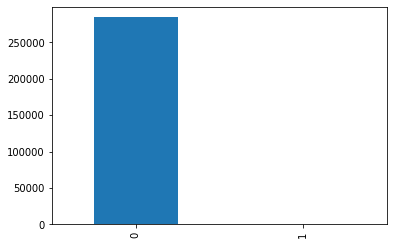

In [ ]:
count = pd.value_counts(data['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
count

-This shows that the two classes are really imbalanced.

-Describing the data:

In [ ]:
# Let us see the shape of our data
print(data.shape)
print(data.describe())


NameError: ignored

In [ ]:
# Determination of fraud and valid cases from our dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


-Only 0.17% transactions are fraudulent out of all the transactions.

-Analysing correlation and relevance of features through Boxplots and Correlation matrix:

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


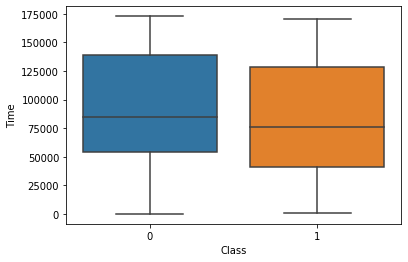

In [ ]:
sns.boxplot(x="Class", y="Time",data=data)
data.groupby("Class").Time.describe()

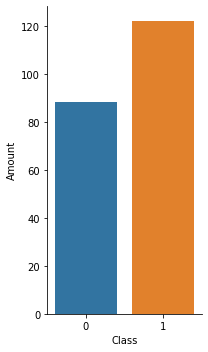

In [ ]:
sns.catplot(x="Class", y="Amount", data=data, kind="bar", ci=None, aspect=.6)

In [ ]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

-Observation: The average money transaction for the fraudulent ones is more. This shows how important and crucial our problemt state is.

-Plotting the correlation matrix:

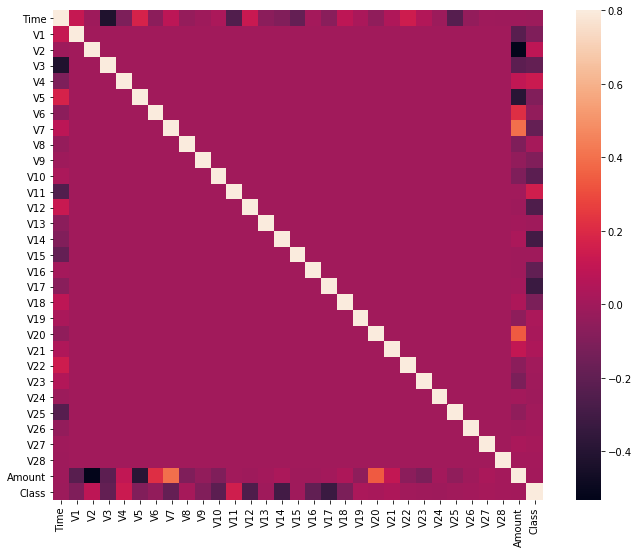

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


-In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

-Seperating the X and Y values:

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(284807, 30)
(284807,)


-Training and Testing data split:

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)


ALGORITHM IMPLEMENTATION

# RANDOM FOREST

In [ ]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)


In [ ]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))



The model used is Random Forest classifier
The accuracy is 0.9995435553526912
The precision is 0.9615384615384616
The recall is 0.7653061224489796
The F1-Score is 0.8522727272727273


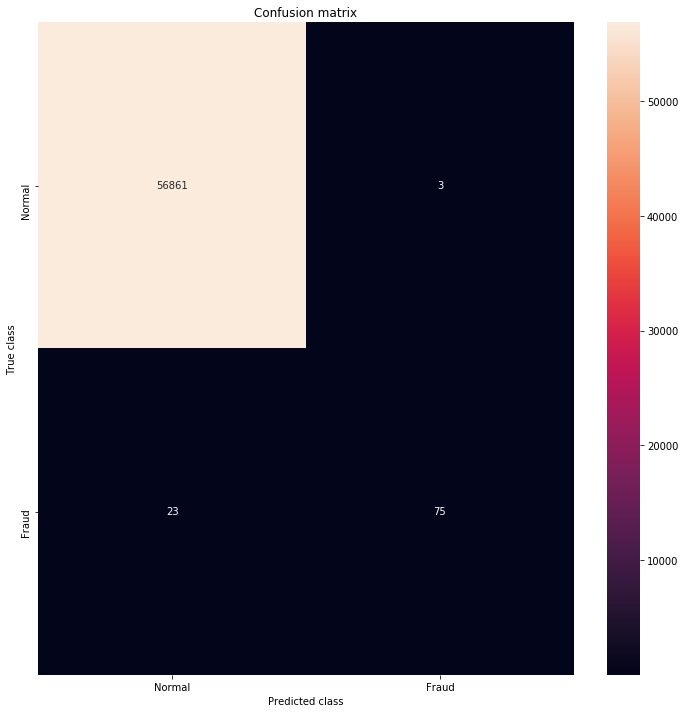

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
# random forest model creation
logreg = LogisticRegression(max_iter=500)
logreg.fit(xTrain, yTrain)
# predictions
yPred = logreg.predict(xTest)

In [ ]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Logistic Regression")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))




The model used is Logistic Regression
The accuracy is 0.9988939995084443
The precision is 0.7868852459016393
The recall is 0.4897959183673469
The F1-Score is 0.6037735849056604


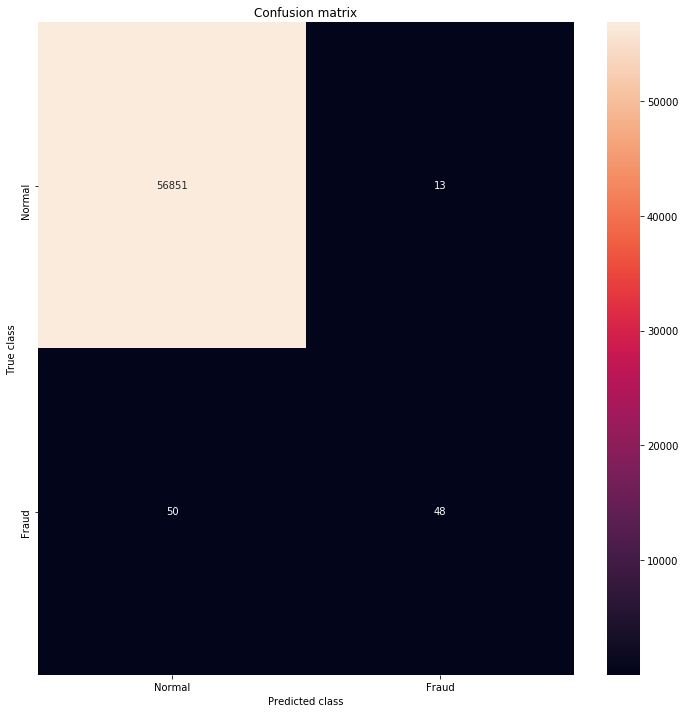

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# DECISION TREE

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(xTrain, yTrain)
# predictions
yPred = model.predict(xTest)

In [ ]:
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Decision tree")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))


The model used is Decision tree
The accuracy is 0.9992099996488887
The precision is 0.7476635514018691
The recall is 0.8163265306122449
The F1-Score is 0.7804878048780487


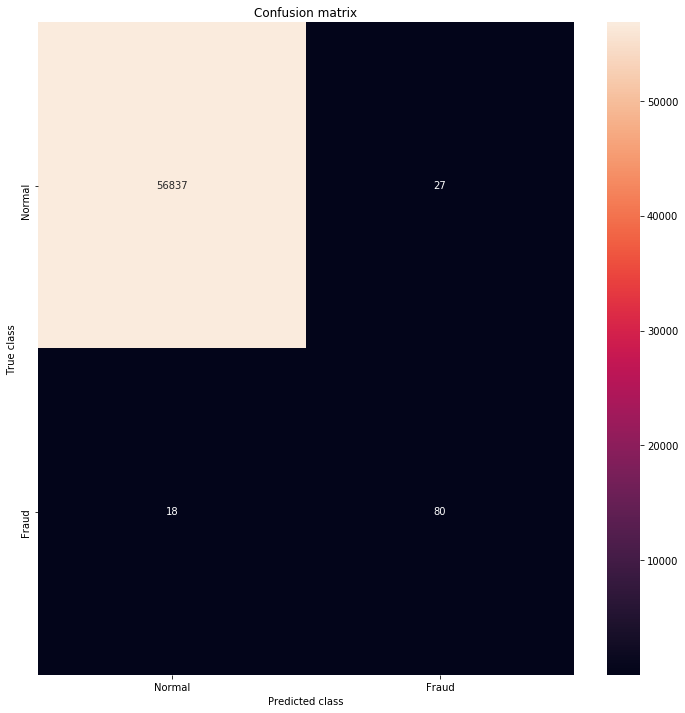

In [ ]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


# CONCLUSION


